In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sample_t = np.linspace(-0.1, np.pi, 300)

short_amps = np.sin(sample_t)
long_amps = np.sin(sample_t-0.5)

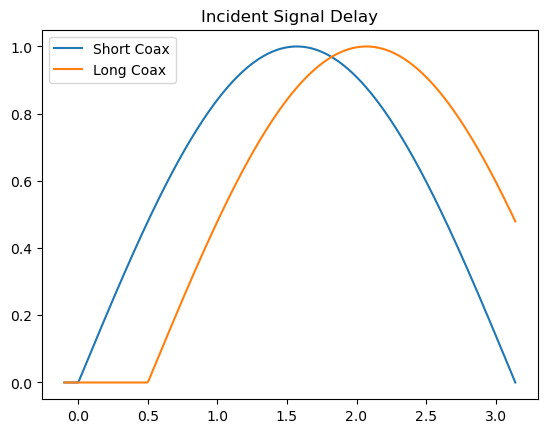

In [3]:
plt.plot(sample_t, [max(short_amps[i], 0) for i in range(len(short_amps))], label="Short Coax")
plt.plot(sample_t, [max(long_amps[i], 0) for i in range(len(long_amps))], label="Long Coax")
plt.title("Incident Signal Delay")
plt.legend()
plt.show()

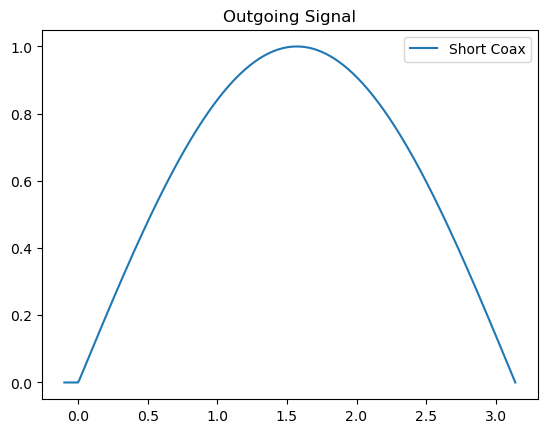

In [4]:
plt.plot(sample_t, [max(short_amps[i], 0) for i in range(len(short_amps))], label="Short Coax")
plt.title("Outgoing Signal")
plt.legend()
plt.show()

# Outline for Code

In [7]:
import pandas as pd
import scipy as sp
import csv

In [10]:
metadata = dict()
row_start = 14
filename_200k_1 = "sine/T0022ALL.CSV"
with open(filename_200k_1, newline='') as csvfile:
    reader = csv.reader(csvfile)
    for (i, row) in enumerate(reader):
        if i > row_start: break
        if len(row) >= 2: metadata[row[0]] = row[1]
metadata

{'Model': 'MSO2024B',
 'Firmware Version': '1.56',
 'Point Format': 'Y',
 'Horizontal Units': 'S',
 'Horizontal Scale': '1e-05',
 'Sample Interval': '1e-09',
 'Filter Frequency': '2e+08',
 'Record Length': '100000',
 'Gating': '0.0% to 100.0%',
 'Probe Attenuation': '1',
 'Vertical Units': 'V',
 'Vertical Offset': '0',
 'Vertical Scale': '0.2',
 'Label': ''}

In [14]:
data_200k_1 = pd.read_csv(filename_200k_1, delimiter=",", header=row_start)

In [230]:
t_200k_1 = data_200k_1["TIME"].to_numpy()  # first trial for 200kHz
ch1_200k_1 = data_200k_1["CH1"].to_numpy()
ch2_200k_1 = data_200k_1["CH2"].to_numpy()
print(t_200k_1)

[-4.9560e-05 -4.9559e-05 -4.9558e-05 ...  5.0437e-05  5.0438e-05
  5.0439e-05]


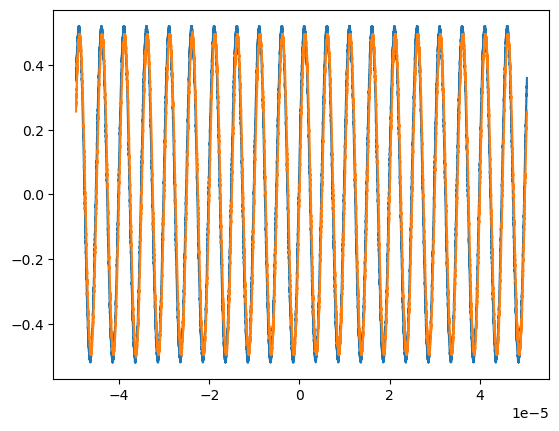

In [231]:
plt.plot(t_200k_1, ch1_200k_1)
plt.plot(t_200k_1, ch2_200k_1)

In [232]:
def sin_wave(t, omega, phi, a, c):
    return a * (np.sin(t * omega + phi)) + c

In [247]:
ff = np.fft.fftfreq(len(t_200k_1), (t_200k_1[1]-t_200k_1[0]))
Fyy = abs(np.fft.fft(ch1_200k_1))
guess_freq = abs(ff[np.argmax(Fyy[1:])+1])  # use a fast fourier transform to make frequency bins and then get the fft of the dataset to make a good guess of the frequency

## TODO: CONVERT THIS WHOLE SECTION INTO A SINGLE FUNCTION TO GET THE PHASE SHIFT AND SPEED OF LIGHT FOR ANY GIVEN PAIR OF SINE WAVE FUNCTIONS

In [234]:
guess = [2 * np.pi * guess_freq, 0, np.std(ch1_200k_1) * 2.**0.5, np.mean(ch1_200k_1)]

In [235]:
poptch1200k1, pcovch1200k1 = sp.optimize.curve_fit(sin_wave, t_200k_1, ch1_200k_1, p0=guess)
poptch2200k1, pcovch2200k1 = sp.optimize.curve_fit(sin_wave, t_200k_1, ch2_200k_1, p0=guess)

In [236]:
(poptch2200k1 - poptch1200k1)[1]  # phase offset between the two channels

-0.21502625345034956

In [237]:
time_delay = phi_200k_1 / (2 * np.pi) / poptch1200k1[0]

In [239]:
(28.912 - 2.04) / time_delay

63210092.59382016

In [240]:
poptch1200k1, poptch2200k1

(array([ 1.25663342e+06,  2.14829720e-01,  5.12719516e-01, -4.74247883e-04]),
 array([ 1.25663834e+06, -1.96533352e-04,  4.91324550e-01, -1.82578257e-03]))

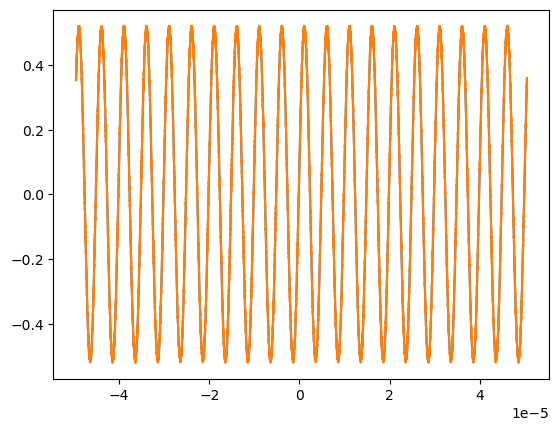

In [241]:
plt.plot(t_200k_1, sin_wave(t_200k_1, *poptch1200k1))
plt.plot(t_200k_1, ch1_200k_1)

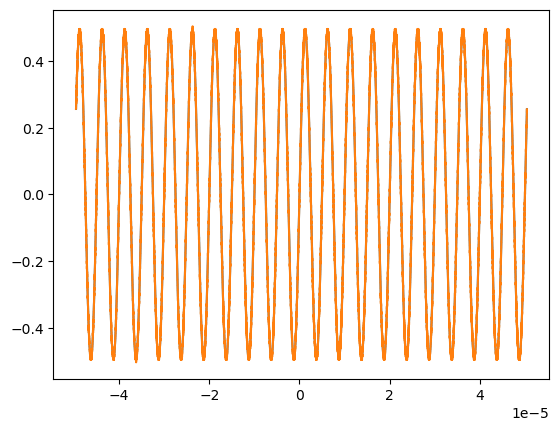

In [242]:
plt.plot(t_200k_1, sin_wave(t_200k_1, *poptch2200k1))
plt.plot(t_200k_1, ch2_200k_1)